In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('super-store.csv', encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='str')

In [5]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
df.dtypes

Row ID             int64
Order ID             str
Order Date           str
Ship Date            str
Ship Mode            str
Customer ID          str
Customer Name        str
Segment              str
Country              str
City                 str
State                str
Postal Code        int64
Region               str
Product ID           str
Category             str
Sub-Category         str
Product Name         str
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [7]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
df.dtypes

Row ID                    int64
Order ID                    str
Order Date       datetime64[us]
Ship Date        datetime64[us]
Ship Mode                   str
Customer ID                 str
Customer Name               str
Segment                     str
Country                     str
City                        str
State                       str
Postal Code               int64
Region                      str
Product ID                  str
Category                    str
Sub-Category                str
Product Name                str
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [9]:
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Shipping_Days'] = df['Ship Date'] - df['Order Date'] 

In [10]:
test_df = df[['Shipping_Days', 'Order_Year', 'Order_Month']]
test_df

,Shipping_Days,Order_Year,Order_Month
0,3 days,2016,11
1,3 days,2016,11
2,4 days,2016,6
3,7 days,2015,10
4,7 days,2015,10
...,...,...,...
9989,2 days,2014,1
9990,5 days,2017,2
9991,5 days,2017,2
9992,5 days,2017,2


In [11]:
df[['Sales', "Profit"]].describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


In [12]:
loss_orders = df[df['Profit'] < 0]
loss_percentage = len(loss_orders) / len(df) * 100
loss_percentage

18.721232739643785

I discovered that nearly 19% of all transactions are unprofitable. This is a critical insight because it means the company is effectively subsidizing one-fifth of its customer base. My next step would be to investigate if these losses are concentrated in a specific 'Category' or 'Region,' or if aggressive discounting is the primary driver.

In [13]:
df['Profit_Margin'] = df['Profit'] / df['Sales']
df['Profit_Margin'].describe()

count    9994.000000
mean        0.120314
std         0.466754
min        -2.750000
25%         0.075000
50%         0.270000
75%         0.362500
max         0.500000
Name: Profit_Margin, dtype: float64

The profit margin analysis reveals a bimodal story. Our median margin is strong at 27%, indicating that our core business is fundamentally sound. However, the mean is significantly lower at 12% due to extreme negative outliers.

With a minimum margin of -275%, it’s clear that certain transactions—likely those 70-80% discounts we saw earlier—are not just unprofitable, they are value-destructive. We aren't just losing our profit; we are losing nearly triple the cost of the sale on our worst-performing items.

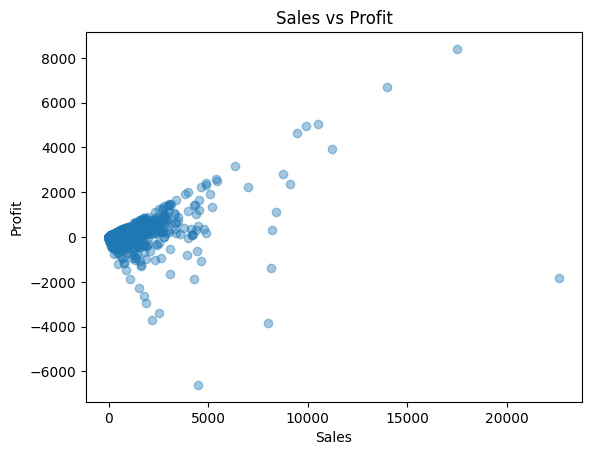

In [14]:
plt.scatter(df['Sales'], df['Profit'], alpha=0.4)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Sales vs Profit')
plt.show()

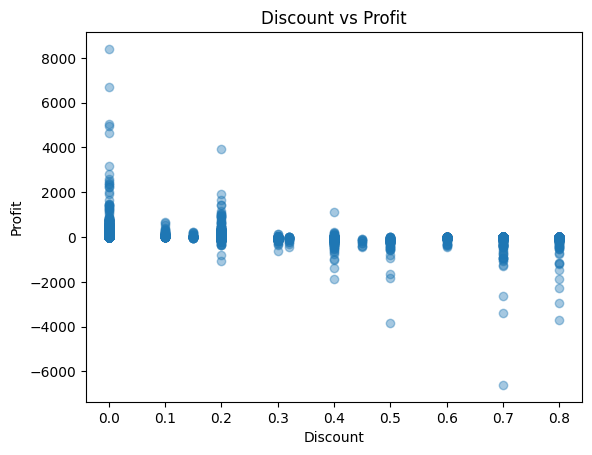

In [15]:
plt.scatter(df['Discount'], df['Profit'], alpha=0.4)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Discount vs Profit')
plt.show()

The scatter plot reveals a critical threshold at 20% discount. While low discounts correlate with healthy profit margins, any discount exceeding 20% drastically increases the likelihood of a loss.

Specifically, at the 70% and 80% discount levels, we see extreme negative outliers—some exceeding a $6,000 loss per order.

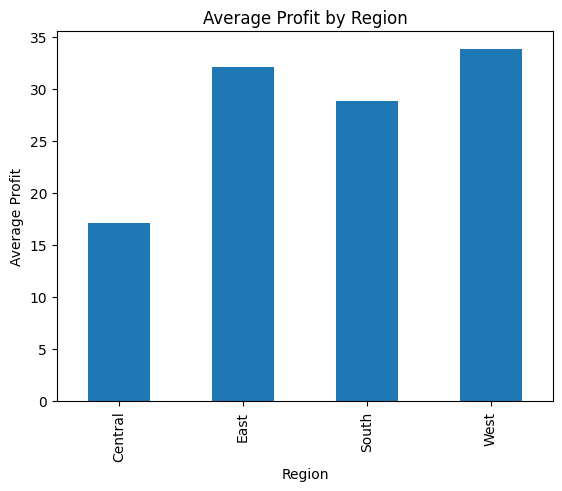

In [16]:
df.groupby('Region')['Profit'].mean().plot(kind='bar')
plt.ylabel('Average Profit')
plt.title('Average Profit by Region')
plt.show()

Looking at the regional performance, the Central region is a significant outlier with an average profit of only $17—nearly half of what we see in the West.

When I cross-reference this with the Discount vs. Profit scatter plot, it becomes highly likely that the Central region's low performance is driven by the high-discount clusters (the 70-80% range) that we identified as profit-killers. My next step would be to see if we are over-discounting specifically in Central states like Texas or Illinois to chase volume at the expense of our bottom line

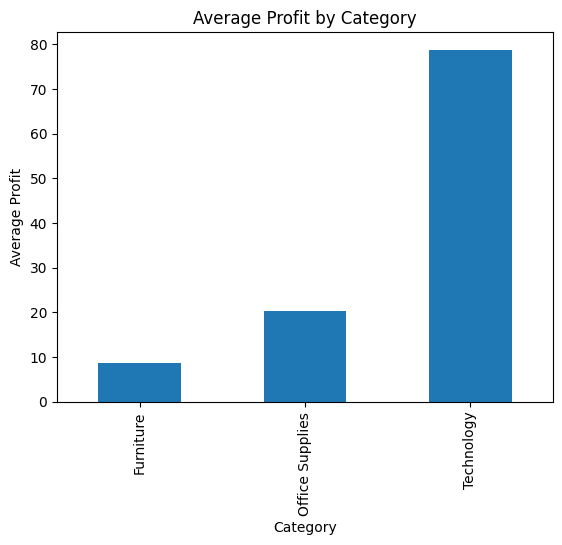

In [17]:
df.groupby('Category')['Profit'].mean().plot(kind='bar')
plt.ylabel('Average Profit')
plt.title('Average Profit by Category')
plt.show()

In [18]:
# This will show you the average profit and loss count per category
df.groupby('Category')['Profit'].agg([
    ('Average', 'mean'), 
    ('Median', 'median'), 
    ('Total Orders', 'count'), 
    ('Loss Count', lambda x: (x < 0).sum())
])

,Average,Median,Total Orders,Loss Count
Category,,,,
Furniture,8.699327,7.7748,2121,714
Office Supplies,20.327050,6.8824,6026,886
Technology,78.752002,25.0182,1847,271


When I broke the losses down by Category, Technology emerged as the clear leader in profitability. However, Furniture is a major concern. Despite selling high-value items, the average profit is only $8.70, and it has a disproportionately high number of loss-making orders (714). This suggests that the 19% total loss rate we found earlier is being driven largely by the Furniture department.

In [19]:
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Profit_Margin']

corr_matrix = df[numeric_cols].corr()

print(corr_matrix)

                  Sales  Quantity  Discount    Profit  Profit_Margin
Sales          1.000000  0.200795 -0.028190  0.479064       0.003444
Quantity       0.200795  1.000000  0.008623  0.066253      -0.005280
Discount      -0.028190  0.008623  1.000000 -0.219487      -0.864452
Profit         0.479064  0.066253 -0.219487  1.000000       0.223732
Profit_Margin  0.003444 -0.005280 -0.864452  0.223732       1.000000


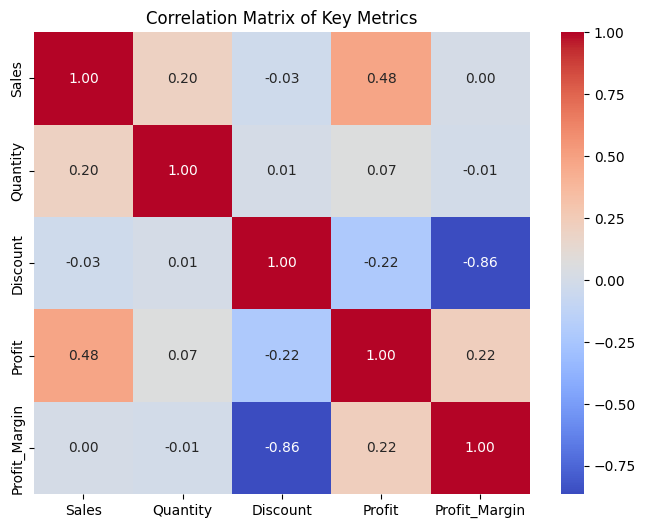

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Key Metrics')
plt.show()

Correlation analysis showed that while sales and quantity have a modest positive effect on profit, discount has the strongest negative impact, particularly on profit margin. This indicates that discounting strategies must be carefully managed, as high discounts can erode profitability even in high-sales orders.

In [25]:
df.to_csv('feature-engineered.csv', index=False)